<p> 
<center>
<img src="https://drive.google.com/uc?id=1GkJc15QvDRudsBwF9Oq7d4Op1_tt2sBW"
width="350" height="120"> 
</center>
<h1><b><center> 
Computational methods </center></b></h1>
<h3><b><i><center>Parcial III</center><i></b><h3>
<h4><i><center>Juanita Andrea Agudelo</center></i><h4>
<h4><center>30 Marzo 2022</center><h4>

# Examen parcial 3 (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 30.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio 1

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio

El disco es lo suficientemente delgado como para que, con fines matemáticos, podamos tratarlo como un objeto bidimensional. Asumimos que la densidad se da en términos de masa por unidad de área (llamada densidad de área), y además asumimos que la densidad varía solo a lo largo del radio del disco (llamada densidad radial). Orientamos el disco en el plano xy, con el centro en el origen. Entonces, la densidad del disco puede ser tratada como una función de x, denotada $\rho(x)$.
<table><tr>
<td> <img src="disk_radius_density.png" width="500" /> </td>
</tr></table>   

* a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje `x` y el eje `y`).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* Pista:`x`: is radius and `y`: is ***integrand***


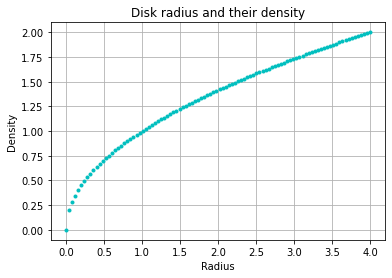

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data_radius_density.csv")
 
plt.plot(df['radius'], df['density'], '.c')
plt.title('Disk radius and their density')
plt.xlabel('Radius')
plt.ylabel('Density')
plt.grid()

Se realiza la integral del conjunto de datos en este caso de radio y densidad mediante el método de trapzoide haciendo uso de la librería scipy. Como se requiere calcular la masa y la masa viene dada por la siguiente integral 
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
debemos calcular el Y haciendo uso de la integral de la masa.

$$Y=2 \pi \ r * \rho (r)$$

Usando los datos de densidad y radio proporcionados en el ejercicio. 

In [29]:
import scipy

y=[]
for i in range(len(df['radius'])):
  y.append(2*np.pi*df['radius'][i]*df['density'][i])

I_trapz=scipy.integrate.trapz(y,df['radius'])

print('La masa del disco: ', I_trapz, 'Kg')

La masa del disco:  80.42728369193307 Kg


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica.
* d) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* e) usando el ultimo grafico hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)
* f) hace interpolacion cubica (100 puntos) de los valores de pression $P$, repite puntos `c)` y `d)`

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

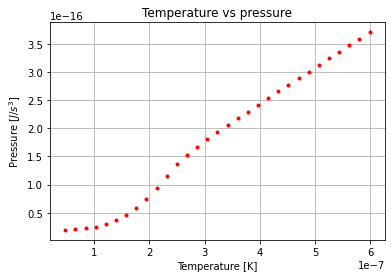

In [30]:
df2 = pd.read_csv("data_pressure_vs_temparature.csv")

plt.plot(df2['Temperature'], df2['Pressure'], '.r')
plt.title('Temperature vs pressure')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [$J/s^3$]')
plt.grid()

Como se tiene un conjunto de datos, en este caso de temperatura y presión, se realiza el cálculo para encontrar la capacidad calorífica usando el método gradient de la librería numpy, el cual calcula la derivada o gradiente del conjunto de datos 

El valor máximo de la derivada (gradiente) es  1.1976979318858835e-09


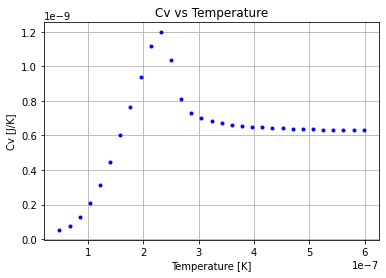

In [31]:
import matplotlib.pyplot as plt
Derivate=np.gradient(df2['Pressure'], df2['Temperature'])

plt.plot(df2['Temperature'], Derivate, '.b')
plt.title('Cv vs Temperature')
plt.xlabel('Temperature [K]')
plt.ylabel('Cv [J/K]')
plt.grid()

#Para saber el valor máximo de Cv y encontrar el punto crítico de temperatura 
max_Derivate=np.max(Derivate)
print('El valor máximo de la derivada (gradiente) es ', max_Derivate)

Del gráfico anterior se observa que el valor de temperatura crítico del gas ocurre al rededor del punto (2.3e-7, 1.1976e-9). El valor crítico ocurre cuando existe un cambio abrupto en la dirección del gradiente.

# Ejercicio 3

Dada es Matrix $S$:

$$S=
\begin{bmatrix}
1 &  -1 & -1 & -1\\
-1 &  2 & 0 & 0\\
-1 &  3 & 3 & 0 \\
-1 &  0 & 1 & 4 \\
\end{bmatrix}$$


a) calcular $S^5$ utilizando diagonalización.  

b) crear una funcion `matrix_power(A,n)` que recive dos parametros: matrix $A$, y valor entero de la potencia $n$. Funcion tiene que devolver una matrix $M=A^n$ (usa diagonalizacion)

In [32]:
S = np.array([[1,-1,-1,-1],
              [-1,2,0,0],
              [-1,3,3,0],
              [-1,0,1,4]])

In [33]:
from numpy.linalg import *
e, U = eig(S)
D = np.diag(e,0)

print('U = ',np.around(U).real)
print('D = ',np.around(D).real)

print('UDU^-1 = ', np.around(U@D@inv(U)).real)

U =  [[-0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0. -0. -1. -1.]
 [ 1.  0.  0.  1.]]
D =  [[5. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 3.]]
UDU^-1 =  [[ 1. -1. -1. -1.]
 [-1.  2. -0.  0.]
 [-1.  3.  3.  0.]
 [-1.  0.  1.  4.]]


Como se espera $UDU^{-1} = S$, así, nos aseguramos que nuestro proceso de diagonalización se realizó de manera exitosa.

Ahora, notemos que:

$$S^{5} = (UDU^{-1})^{5}$$

Lo que se puede expresar de manera equivalente como:

$$S^{5} = UDU^{-1}UDU^{-1}UDU^{-1}UDU^{-1}UDU^{-1}$$

Pero notemos que:

$$S^{5} = UD\underbrace{U^{-1}U}_{I}D\underbrace{U^{-1}U}_{I}D\underbrace{U^{-1}U}_{I}D\underbrace{U^{-1}U}_{I}DU^{-1}$$

Así, obtenemos que:

$$S^{5} = UDDDDDU^{-1} = UD^{5}U^{-1}$$

Esto facilita nuestro proceso ya que $D$ es una matriz diagonal por lo que su potencia está dada por elevar cada una de las componente de su diagonal a la potencia indicada:

In [34]:
print('S^5 = U(D^5)U^-1 = \n', np.around(U@D**5@inv(U)).real)

S^5 = U(D^5)U^-1 = 
 [[  485.  -755.  -563.  -563.]
 [ -179.   280.   192.   192.]
 [ -675.  1201.   707.   464.]
 [-1027.  1448.  1275.  1518.]]


Notemos que el precedimiento mostrado anteriormente para llegar a la potencia 5 de una matriz utilizando diagonalización se puede extender a cualquier potencia $n$, es decir:

$$S^{n} = UD^{n}U^{-1}$$

Así pues:

In [35]:
def matrix_power(A,n):
 
  e, U = eig(S)
  D = np.diag(e,0)
  
  print('S^', n, '= U(D^',n,')U^-1 = \n', np.around(U@D**n@inv(U)).real)

In [36]:
matrix_power(S,5)

S^ 5 = U(D^ 5 )U^-1 = 
 [[  485.  -755.  -563.  -563.]
 [ -179.   280.   192.   192.]
 [ -675.  1201.   707.   464.]
 [-1027.  1448.  1275.  1518.]]


# Feedback:
```
Exercise 1.
Importation of the data + labeled plot (rho vs. r)	            (max 0.5p):	0.5p
Calculation of the integral                 		              (max 1.5p):	1.5p

Exercise 2.
Importation of the data + labeled plot P vs. T 	               (max 0.5p):	0.5p
Calculation of the derivative and plot Cv vs. T        		   (max 2.0p):	2.0p
Approximation of the critical temperature                         (max 0.5p):	0.5p
Interpolation                                                     (max 1.0p):	0.0p

Exercise 3.
Calculation of the M^n                                 	       (max 2.0p):	2.0p
Function of the M^n                                    	       (max 2.0p):	2.0p

- Total:                                                          (max 10.0p):   9.0p
```